# Verificación (Tarea 10)

Pretendemos verificar la solución de la siguiente ecuación diferencial estocástica.

$$
\mathrm{d}S_{t}=\alpha\left(t\right)S_{t}\mathrm{d}t+\beta\left(t\right)S_{t}\mathrm{d}W_{t}
$$

Para ello, usaremos el método de Euler-Maruyama.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import brownian_motion as bw

## Método Númerico

Primero, vamos a resolverlo mediante el método de Euler-Maruyama. En nuestro caso. 

\begin{align*}
\alpha\left(t\right) & =\sin\left(t\right)\\
\beta\left(t\right) & =\dfrac{t}{1+t}
\end{align*}


In [77]:
def alpha(t):
    y = np.sin(t)
    return y
def beta(t):
    y = t / (1.0 + t)
    return y

Con esto, podemos definir cada secction de la ecuación diferencial 

In [78]:
def drift(t, x):
    a = alpha(t) * x
    return a

def diffusion(t, x):
    b = beta(t) * x
    return b

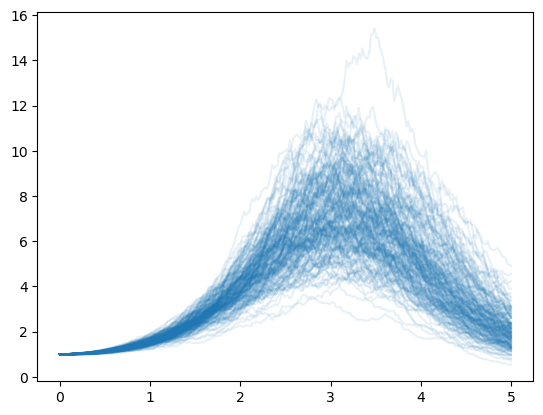

In [79]:
samples = 200
sigma = 2 ** (-2)
n_p = 2 ** 8
T = 5.0
x_0 = 1.0

def get_em_solution(x_0, T, N, sigma):
    x_t = np.zeros(N)
    x_t[0] = x_0
    dt = T / N
    t, W = bw.u(T, N)
    for i in np.arange(N - 1):
        w_inc = W[i + 1] - W[i]
        f = drift(t[i], x_t[i])
        g = diffusion(t[i], x_t[i])
        x_t[i + 1] = x_t[i] + f * dt + sigma * g * w_inc  # Importante la sigma.
    return t, x_t

fig, ax = plt.subplots()
df = []
for k in np.arange(samples):
    t, x_t = get_em_solution(x_0, T, n_p, sigma)
    df.append(x_t)
    # df.append([t, x_t])
    ax.plot(t, x_t, color="C0", alpha=0.1)
plt.show()

## Metódo Análitico.

Se puede probar que la solución análitica de la ecuación diferencial estocástica mencionad anteriormente esta dada por 

$$
S_{t}=S_{0}\exp\left(\int_{0}^{t}\left[\alpha\left(s\right)-\dfrac{1}{2}\beta^{2}\left(s\right)\right]\mathrm{d}s+\int_{0}^{t}\beta\left(s\right)\mathrm{d}W\left(s\right)\right)
$$

Entonces, vamos a intentar modelar la solución. Para ello definiremos 


\begin{align*}
u\left(s\right)= & \alpha\left(s\right)-\dfrac{1}{2}\beta^{2}\left(s\right)\\
v\left(s\right)= & \beta\left(s\right),
\end{align*}
entonces 

$$
S_{t}=S_{0}\exp\left(\int_{0}^{t}u\left(s\right)\mathrm{d}s+\int_{0}^{t}v\left(s\right)\mathrm{d}W_{s}\right)
$$





In [80]:
s_0 = x_0

def u(t, sigma):
    y = alpha(t) - 0.5 * (sigma * beta(t)) ** 2
    return y
def v(t,sigma):
    y = sigma * beta(t)
    return y

Ahora, llamaremos las integrales de Riemann e Ito respectivamente.

In [81]:
def ito_n(n_points: int, t: float, sigma: float):
    time, w = bw.u(t, n_points)
    integral = np.zeros(n_points)
    for i in range(n_points - 1):
        integral[i] = v(time[i], sigma) * (w[i + 1] - w[i])
    ito = integral.sum()
    return ito


def riemann_integral(a, b, n_points, sigma):
    r = np.zeros(n_points)
    time = np.linspace(a,b,n_points)
    for i in range(n_points - 1):
        r[i] = u(time[i], sigma) * (time[i + 1] - time[i])
    riemann = r.sum()
    return riemann


Ahora veremos la modelación. 

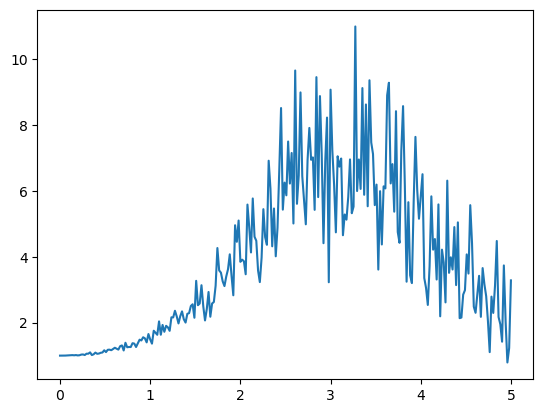

In [82]:
def St(a_0,t,n_p, sigma):
    rmnn = riemann_integral(0, t, n_p, sigma)
    ito = ito_n(n_p, t, sigma) 
    y = a_0 * np.exp(rmnn + ito)
    return y

S = []
for i in range(n_p):
    S.append(St(x_0, t[i], n_p, sigma))

plt.plot(t, S)
plt.show()

Finalmente, generamos las muestras.

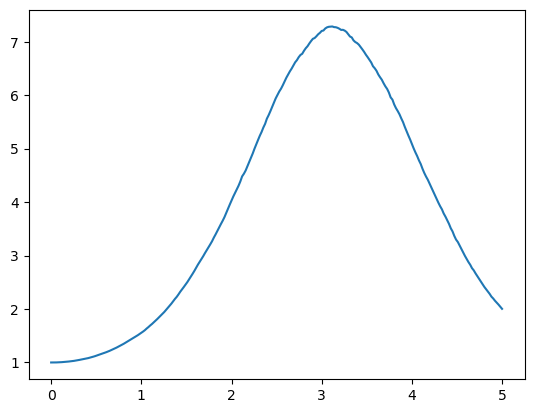

In [101]:
# Simulado EM

em_solutions = np.array(df)

em_mean = em_solutions.mean(axis = 0)
# Simulado, Solucion General.

general_estimation = np.zeros((samples, n_p))

for i in range(samples):
    for j in range(n_p):
        general_estimation[i, j] = St(x_0, t[j], n_p, sigma)

general_mean = general_estimation.mean(axis = 0)

Ahora hagamos la comparativa.

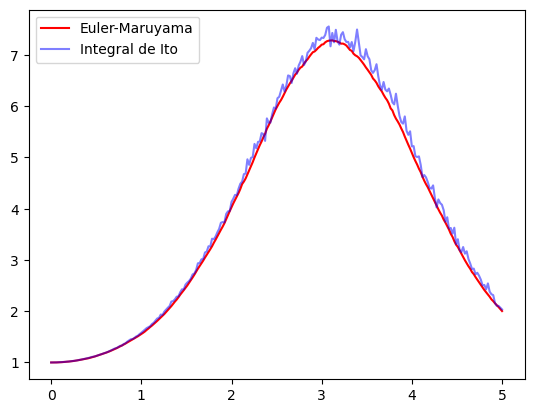

In [118]:
plt.plot(t, em_mean, 'r')
plt.plot(t, general_mean, 'b', alpha = 0.5)
plt.legend(['Euler-Maruyama','Integral de Ito'])
plt.show()

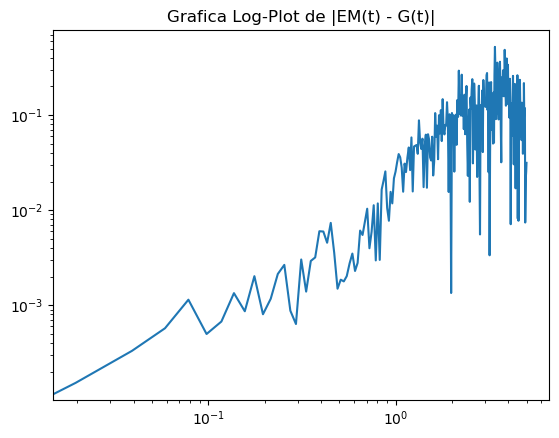

In [112]:



plt.loglog(t, np.abs(em_mean - general_mean))
plt.title("Grafica Log-Plot de |EM(t) - G(t)|")
plt.show()